In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv('electricalpower.csv')
#print(df.head())
X=df.iloc[:,0:4]
Y=df.iloc[:,4]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [3]:
Xm=np.mean(X_train,axis=0)#Column wise mean
Ym=np.mean(Y)
Xsd=np.std(X,axis=0)
Ysd=np.std(Y)
X_train=(X_train-Xm)/Xsd
Y_train=(Y_train-Ym)/Ysd
X_test=(X_test-Xm)/Xsd

In [4]:
mymod=MLPRegressor(hidden_layer_sizes=(8,4),activation='logistic',solver='sgd',max_iter=1000,
                   learning_rate_init=1e-3)
mymod.fit(X_train,Y_train)
#Evaluate on Test set
Y_pred=mymod.predict(X_test)
Y_pred=Y_pred*Ysd+Ym#Convert back to original scale

Mean Absolute Error:3.958475923951355
Root Mean Square Error:5.020283444058879
Coefficient of Determination:0.9153517215075364


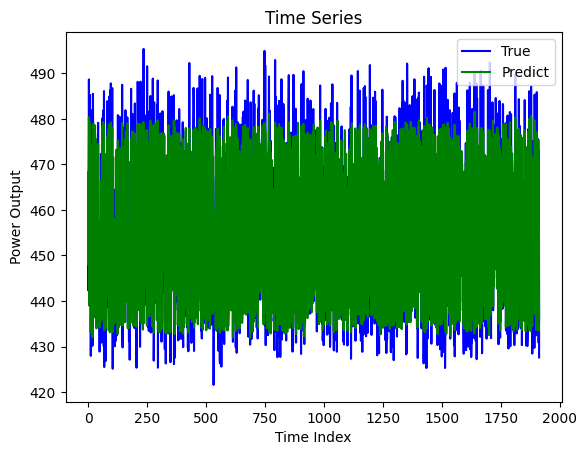

In [5]:
m=list(range(0,len(Y_test)))
print(f'Mean Absolute Error:{mean_absolute_error(Y_test,Y_pred)}')
print(f'Root Mean Square Error:{root_mean_squared_error(Y_test,Y_pred)}')
print(f'Coefficient of Determination:{r2_score(Y_test,Y_pred)}')
plt.plot(m,Y_test,label='True',color='blue')
plt.plot(m,Y_pred,label='Predict',color='green')
plt.xlabel('Time Index')
plt.ylabel('Power Output')
plt.title('Time Series')
plt.legend()
plt.show()

In [8]:
#K-fold Cross Validation
kf=KFold(n_splits=5,shuffle=True)
rmse=np.zeros(5)
mae=np.zeros(5)
r2=np.zeros(5)
i=0
#print(X_train.info())
for train_index,test_index in kf.split(X_train):
    X1=X_train.iloc[train_index,:]#Train set X for specific cross-validation
    Y1=Y_train.iloc[train_index]#Train set Y for specific cross-validation
    X2=X_train.iloc[test_index,:]#Test set X for specific cross-validation
    Y2=Y_train.iloc[test_index]#Test set Y for specific cross-validation
    mymod.fit(X1,Y1)
    Y2pred=mymod.predict(X2)
    Y2=Y2*Ysd+Ym
    Y2pred=Y2pred*Ysd+Ym
    rmse[i]=root_mean_squared_error(Y2,Y2pred)
    mae[i]=root_mean_squared_error(Y2,Y2pred)
    r2[i]=r2_score(Y2,Y2pred)
    i=i+1

In [9]:
Y_pred=mymod.predict(X_test)
Y_pred=Y_pred*Ysd+Ym
#Print Results
print(f'KFold Root Mean Square Error:{np.mean(rmse)}')
print(f'KFold Mean Absolute Error:{np.mean(mae)}')
print(f'KFold Coeffecient of Determination:{np.mean(r2)}')
print(f'Mean Absolute Error:{mean_absolute_error(Y_test,Y_pred)}')
print(f'Root Mean Square Error:{root_mean_squared_error(Y_test,Y_pred)}')
print(f'Coefficient of Determination:{r2_score(Y_test,Y_pred)}')

KFold Root Mean Square Error:5.2419719017475055
KFold Mean Absolute Error:5.2419719017475055
KFold Coeffecient of Determination:0.9049273600875353
Mean Absolute Error:4.177579740341687
Root Mean Square Error:5.2956247183130225
Coefficient of Determination:0.905811895819784
